In [1]:
import json
import os
import pandas as pd

path_data = "caselaw/"

main_attributes = json.load(open(path_data + "2301.json", "rb"))

data = {key: [] for key in main_attributes}

for case in os.listdir(path_data):
    file = json.load(open(path_data + case, "rb"))
    for attribute in data.keys():
        data[attribute].append(file[attribute])
    
df = pd.DataFrame(data)
df.head()

,title,court,courtEng,dateOfDocument,jurisdiction,keywords,summary,summaryEn,language,decisionType,...,nationalCaseLawRecords,caseHistory,ecthrCaseLawRecords,eurovoc,facilexOntology,nationalIdentifier,source,sourceUrl,text,classifiers
0,"VSRH, Kž eun 27/2017-4",Vrhovni sud Republike Hrvatske,The Supreme Court of the Republic of Croatia,2017-11-07T23:00:00Z,"{'label': 'Croatia', 'code': 'HR'}","[content and form of European Arrest Warrant, ...","<p class=""ql-align-justify"">Predmet se odnosi ...","<p class=""ql-align-justify""><span style=""color...","{'label': 'Croatian', 'code': 'HR'}","{'label': 'Other', 'code': 'Ruling'}",...,[],[],[],[],,Kž eun 27/2017-4,,https://sudskapraksa.csp.vsrh.hr/decisionPdf?i...,None,[Content of EAW]
1,"Rechtbank Amsterdam, 11-06-2020, ECLI:NL:RBAMS...",Rechtbank Amsterdam,Court of Amsterdam,2020-11-10T23:00:00Z,"{'label': 'Netherlands', 'code': 'NL'}","[FW Decision 2002/584 (EAW), assault]",None,"<p class=""ql-align-justify""><em>The case conce...","{'label': 'Dutch', 'code': 'NL'}","{'label': 'Judgment', 'code': 'J'}",...,[],[],[],[],,13/751267-20,,,,[Non-mandatory ground for refusal (double crim...
2,Wyrok Sądu Najwyższego z dnia 4 lipca 2013 r. ...,Sąd Najwyższy,Supreme Court,2013-07-03T22:00:00Z,"{'label': 'Poland', 'code': 'PL'}","[detention on remand, FW Decision 2002/584 (EAW)]",<p>Stosowanie tymczasowego aresztowania w toku...,<p>The application of detention on remand in t...,"{'label': 'Polish', 'code': 'PL'}","{'label': 'Judgment', 'code': 'J'}",...,[],[],[],[],,III KK 21/13,Supreme Court Database,http://www.sn.pl/orzecznictwo/SitePages/baza_o...,,[Detention conditions]
3,"Rechtbank Amsterdam, 14-09-2023, ECLI:NL:RBAMS...",Rechtbank Amsterdam,Court of Amsterdam,2023-09-13T22:00:00Z,"{'label': 'Netherlands', 'code': 'NL'}","[Regulation 2018/1805, crime unknown]",,"<p class=""ql-align-justify""><em>The case conce...","{'label': 'Dutch', 'code': 'NL'}","{'label': 'Judgment', 'code': 'J'}",...,"[{'title': 'Rechtbank Amsterdam, 02-05-2023, E...",[],[],[],,23/014471,rechtspraak.nl,https://uitspraken.rechtspraak.nl/#!/details?i...,,"[Freezing, Transmission of a freezing/confisca..."
4,Juzgado Central de Instrucción núm. 4. Auto 88...,Juzgado Central de Instrucción núm. 4,Central Examining Court n. 4,2023-07-06T22:00:00Z,"{'label': 'Spain', 'code': 'ES'}","[FW Decision 2002/584 (EAW), principle of mutu...",<p>El caso se refiere a los delitos de El caso...,<p>The case concerns the crimes of The case co...,"{'label': 'Spanish', 'code': 'ES'}","{'label': 'Order', 'code': 'O'}",...,[],[],[],[],,AAN 7411/2023,Centro de Documentación Judicial,https://www.poderjudicial.es/search/AN/openDoc...,,"[Double criminality, Non-mandatory ground for ..."


In [2]:
df = df[df["jurisdiction"].apply(lambda x: x["label"]) == "Bulgaria"]

# eval similarity based on whether two articles share a common eu provision - upgrade to similar article/paragraphs

relevant_cols = ["title", "summary", "summaryEn", "euCaselaw", "euProvisions", "eurovoc"]
df = df[relevant_cols]
df = df[(df["euProvisions"].str.len() > 0) & (df["eurovoc"].str.len() > 0)]
df.head()

,title,summary,summaryEn,euCaselaw,euProvisions,eurovoc
9,Решение № 156 от 17.05.2021 г. на САС по в. ч....,"<p class=""ql-align-justify"">\t<span style=""col...","<p class=""ql-align-justify"">\t<span style=""col...","[{'celex': '62005CJ0288', 'name': 'Judgment of...","[{'celex': '42000A0922(02)', 'name': 'The Sche...","[{'label': 'European arrest warrant', 'code': ..."
26,Решение № 46 от 21.03.2023 г. на ПАС по в. ч. ...,"<p class=""ql-align-justify""><span style=""color...","<p class=""ql-align-justify"">\t<span style=""col...",[],"[{'celex': '32002F0584', 'name': 'Council Fram...","[{'label': 'European arrest warrant', 'code': ..."
29,Решение № 2895 от 17.09.2020 г. на ОС - Благое...,<p>\tПроизводството е образувано въз основа на...,<p>The proceedings is initiated on the basis o...,"[{'celex': '62018CJ0234', 'name': 'Judgment of...","[{'celex': '32006F0783', 'name': 'Council Fram...",[{'label': 'judicial cooperation in criminal m...
33,Решение № 2 от 8.01.2019 г. на ОС - Сливен по ...,"<p>\t<span style=""color: rgb(86, 86, 86);"">Про...",<p>The proceedings is initiated on the basis o...,[],"[{'celex': '32006F0783', 'name': 'Council Fram...",[{'label': 'judicial cooperation in criminal m...
34,Решение № 36 от 3.05.2022 г. на ОС - Видин по ...,<p>Производството е за признаване и изпълнение...,"<p><span style=""background-color: rgb(244, 244...",[],"[{'celex': '32018R1805', 'name': 'Regulation (...",[{'label': 'judicial cooperation in criminal m...


In [3]:
import re

# remove html elements
df["summaryEn"] = df["summaryEn"].apply(lambda x: re.sub(r"<.*?>", "", x))
df["summary"] = df["summary"].apply(lambda x: re.sub(r"<.*?>", "", x))
print(df.shape)
df.head()

(57, 6)


,title,summary,summaryEn,euCaselaw,euProvisions,eurovoc
9,Решение № 156 от 17.05.2021 г. на САС по в. ч....,"\tДелото е за престъпления, описани като измам...","\tThe case concerns the crimes of fraud, laund...","[{'celex': '62005CJ0288', 'name': 'Judgment of...","[{'celex': '42000A0922(02)', 'name': 'The Sche...","[{'label': 'European arrest warrant', 'code': ..."
26,Решение № 46 от 21.03.2023 г. на ПАС по в. ч. ...,"Делото е за престъпление, описано като изпиран...",\tThe case concerns the crime of laundering of...,[],"[{'celex': '32002F0584', 'name': 'Council Fram...","[{'label': 'European arrest warrant', 'code': ..."
29,Решение № 2895 от 17.09.2020 г. на ОС - Благое...,\tПроизводството е образувано въз основа на по...,The proceedings is initiated on the basis of a...,"[{'celex': '62018CJ0234', 'name': 'Judgment of...","[{'celex': '32006F0783', 'name': 'Council Fram...",[{'label': 'judicial cooperation in criminal m...
33,Решение № 2 от 8.01.2019 г. на ОС - Сливен по ...,\tПроизводството е образувано въз основа на по...,The proceedings is initiated on the basis of a...,[],"[{'celex': '32006F0783', 'name': 'Council Fram...",[{'label': 'judicial cooperation in criminal m...
34,Решение № 36 от 3.05.2022 г. на ОС - Видин по ...,Производството е за признаване и изпълнение на...,The proceedings is initiated on the basis of a...,[],"[{'celex': '32018R1805', 'name': 'Regulation (...",[{'label': 'judicial cooperation in criminal m...


In [4]:
import numpy as np
import torch

from sentence_transformers import SentenceTransformer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


$P=\frac{relevant\ retrieved\ docs}{total\ retrieved\ docs}$

$R=\frac{relevant\ retrieved\ docs}{total\ retrieved\ docs\ in\ dataset}$

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# at least one shared EU provision ==> similar
# at least one shared EuroVoc ==> similar
# eval - score each of the 5 retrieved cases for shared celex codes (only one celex now)

def cosine_search(query, search, query_type, top_k = 5):
    cosine_scores = cosine_similarity(query, search)
    score_doc = []

    denesting_label = ""
    if query_type == "euProvisions":
        denesting_label = "celex"
    elif query_type == "eurovoc":
        denesting_label = "label"

    for i in range(cosine_scores.shape[0]):
        all_matches = np.argsort(cosine_scores[i])[::-1]
        best_matches = all_matches[1:top_k+1]
        query_celex = df.iloc[i][query_type][0][denesting_label]

        # see which top_k retrieved documents were retrieved
        score = []
        for retrieved_case in best_matches:
            retrieved_celex = [provision[denesting_label] for provision in df.iloc[retrieved_case][query_type]]
            score.append(int(query_celex in retrieved_celex))

        ### find all relevant cases that were missed
        missed_matches = []
        for retrieved_case in all_matches[1:]:
            retrieved_celex = [provision[denesting_label] for provision in df.iloc[retrieved_case][query_type]]
            missed_matches.append(int(query_celex in retrieved_celex))
        
        score_doc.append([np.sum(score)/top_k, np.sum(score)/np.sum(missed_matches)])
        
    # macro precision and recall
    precision, recall = np.mean(score_doc, 0)
    f1 = 2 * precision * recall / (precision + recall)
    
    return precision, recall, f1

In [6]:
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

# at least one shared EU provision ==> similar
# at least one shared EuroVoc ==> similar
# eval - score each of the 5 retrieved cases for shared celex codes (only one celex now)

def cosine_search_both(query, search, top_k):
    cosine_scores = cosine_similarity(query, search)
    score_doc = []

    for i in range(cosine_scores.shape[0]):
        all_matches = np.argsort(cosine_scores[i])[::-1]
        best_matches = all_matches[1:top_k+1]

        query_celex = df.iloc[i]["euProvisions"][0]["celex"]
        query_eurovec = df.iloc[i]["eurovoc"][0]["label"]

        # see which top_k retrieved documents were retrieved
        score = []
        for retrieved_case in best_matches:
            retrieved_celex = [provision["celex"] for provision in df.iloc[retrieved_case]["euProvisions"]]
            retrieved_eurovec = [provision["label"] for provision in df.iloc[retrieved_case]["eurovoc"]]
            score.append(int(query_celex in retrieved_celex or query_eurovec in retrieved_eurovec))

        ### find all relevant cases that were missed
        missed_matches = []
        for retrieved_case in all_matches[1:]:
            retrieved_celex = [provision["celex"] for provision in df.iloc[retrieved_case]["euProvisions"]]
            retrieved_eurovec = [provision["label"] for provision in df.iloc[retrieved_case]["eurovoc"]]
            missed_matches.append(int(query_celex in retrieved_celex or query_eurovec in retrieved_eurovec))
        
        score_doc.append([np.sum(score)/top_k, np.sum(score)/np.sum(missed_matches)])
        
    # macro precision and recall
    precision, recall = np.mean(score_doc, 0)
    f1 = 2 * precision * recall / (precision + recall)

    return precision, recall, f1

In [7]:
# optimal_top_k = 25 (debatable) 

from collections import defaultdict
from functools import partial
from tqdm import tqdm

models = ["distiluse-base-multilingual-cased-v2", "paraphrase-multilingual-mpnet-base-v2"]
search_functions = [partial(cosine_search, query_type = "euProvisions"), partial(cosine_search, query_type = "eurovoc"), cosine_search_both]

scores_search_function = defaultdict()

for search_func in tqdm(search_functions):
    scores = {"Model": [], "Pair": [], "Value": [], "Score": []}

    for model_name in models:
        model = SentenceTransformer("models/" + model_name).to(device)

        data_pairs = [
            ("EN-EN", np.asarray(df["summaryEn"].apply(model.encode).tolist()), np.asarray(df["summaryEn"].apply(model.encode).tolist())),
            ("BG-BG", np.asarray(df["summary"].apply(model.encode).tolist()), np.asarray(df["summary"].apply(model.encode).tolist())),
            ("EN-BG", np.asarray(df["summaryEn"].apply(model.encode).tolist()), np.asarray(df["summary"].apply(model.encode).tolist())),
            ("BG-EN", np.asarray(df["summary"].apply(model.encode).tolist()), np.asarray(df["summaryEn"].apply(model.encode).tolist()))
        ]

        for (pair, query, search) in data_pairs:
            precision, recall, f1 = search_func(query = query, search = search, top_k = 5)

            scores["Model"] += [model_name] * 3
            scores["Pair"] += [pair] * 3
            scores["Value"] += [precision, recall, f1]
            scores["Score"] += ["Precision", "Recall", "F1"]

    name = ""
    if type(search_func) == partial:
        name = search_func.func.__name__ + "_" + "_".join(list(search_func.keywords.values()))
    else:
        name = search_func.__name__
    scores_search_function[name] = scores


100%|██████████| 3/3 [00:38<00:00, 12.90s/it]


<Figure size 1600x900 with 0 Axes>

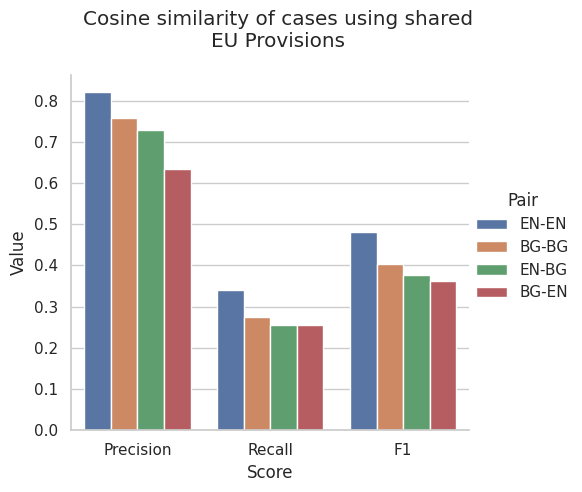

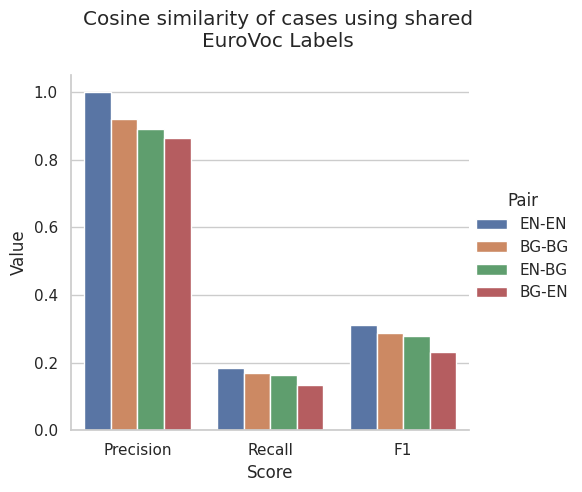

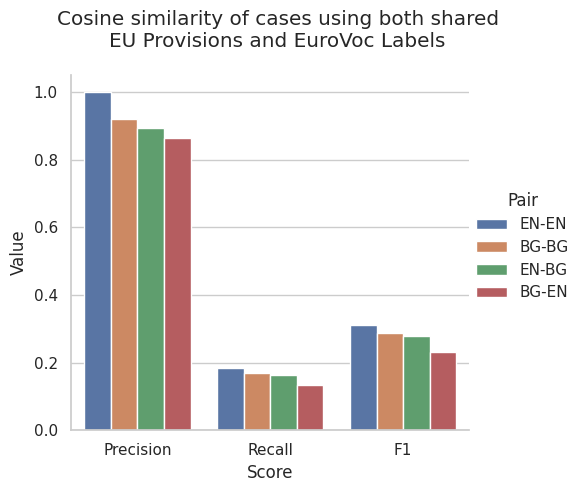

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

figure_title_names = {
    "cosine_search_euProvisions": "Cosine similarity of cases using shared\nEU Provisions",
    "cosine_search_eurovoc": "Cosine similarity of cases using shared\nEuroVoc Labels",
    "cosine_search_both": "Cosine similarity of cases using both shared\nEU Provisions and EuroVoc Labels"
}

plt.figure(figsize = (16,9))
sns.set_theme(style = "whitegrid")
for func_name, score_func in scores_search_function.items():
    scores_df = pd.DataFrame(score_func)
    scores_df = scores_df[scores_df["Model"] == "paraphrase-multilingual-mpnet-base-v2"]

    fig = sns.catplot(kind = "bar", data = scores_df, x = "Score", y = "Value", hue = "Pair")
    fig.figure.subplots_adjust(top=0.85)
    fig.figure.suptitle(figure_title_names[func_name])
    
    plt.savefig(f"{func_name}.png", transparent = True)
    plt.show()

Further refinement: check the retrieved documents, and if they are not relevant continue searching until a relevant case is found, up until top_k documents have been found